In [28]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

About Dataset
Dataset Overview:
This dataset comprises 2,000 entries scraped from AliExpress, detailing a variety of
furniture products. It captures key sales metrics and product details, offering a
snapshot of consumer purchasing patterns and market trends in the online furniture
retail space.

Data Science Applications:
The dataset is ripe for exploratory data analysis, market trend analysis, and price
optimization studies. It can also be used for predictive modeling to forecast sales,
understand the impact of discounts on sales volume, and analyze the relationship
between product features and their popularity.

Column Descriptors:
● productTitle: The name of the furniture item.
● originalPrice: The original price of the item before any discounts.
● price: The current selling price of the item.
● sold: The number of units sold.
● tagText: Additional tags associated with the item (e.g., "Free shipping").

Ethically Collected Data:
The data was collected in compliance with ethical standards, ensuring respect for user
privacy and platform terms of service.

Acknowledgements:
This dataset was created with data sourced from AliExpress, using Apify for scraping.
The thumbnail image was generously provided by Spacejoy on Unsplash. We extend
our gratitude to these parties for their contributions to this dataset.
Photo by Spacejoy on Unsplash.

In [29]:
# View the first few rows of the dataset
print(df.head())

                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  


In [30]:
# Check for missing values
print(df.isnull().sum())
# Dropping any rows with missing values (if applicable)
df = df.dropna()
# Converting tagText into a categorical feature (if necessary)
df['tagText'] = df['tagText'].astype('category').cat.codes
# Checking for data types and conversions if necessary
print(df.info())

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 2 to 1983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   487 non-null    object
 1   originalPrice  487 non-null    object
 2   price          487 non-null    object
 3   sold           487 non-null    int64 
 4   tagText        487 non-null    int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 19.5+ KB
None


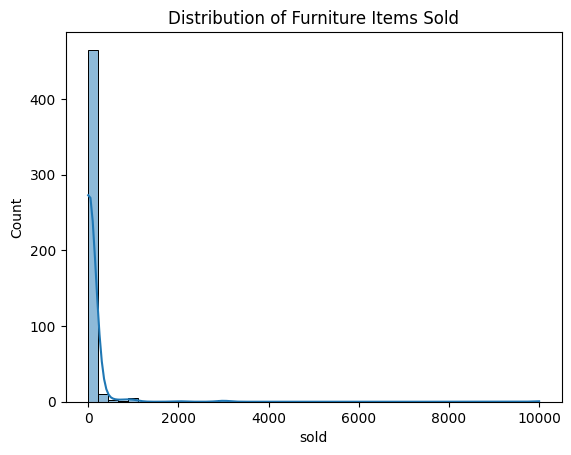

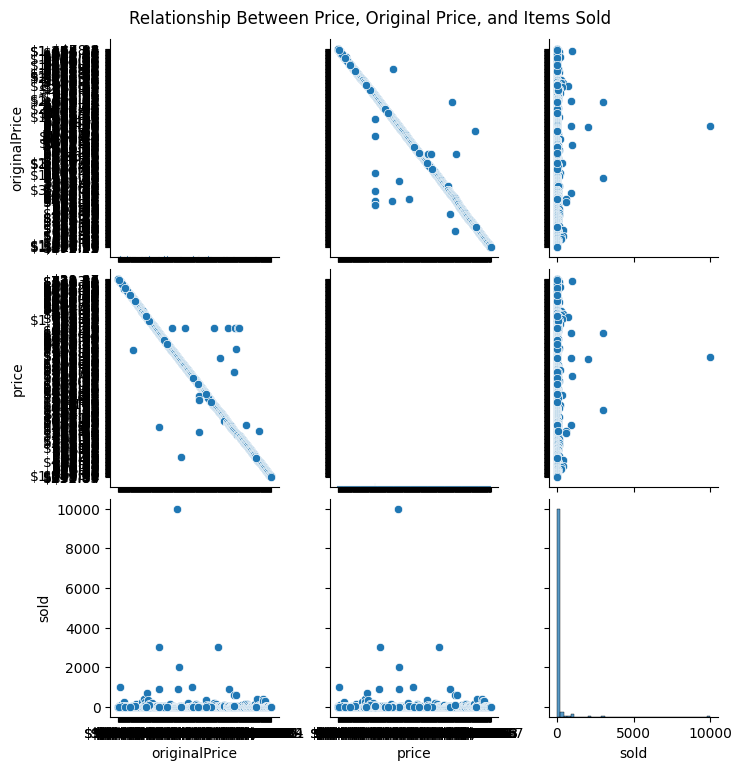

In [31]:
# Distribution of 'sold' values
sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.show()

# Plot the relationship between originalPrice, price, and sold
sns.pairplot(df, vars=['originalPrice', 'price', 'sold'], kind='scatter')
plt.suptitle('Relationship Between Price, Original Price, and Items Sold', y=1.02)  # suptitle for pairplot
plt.show()


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure price columns are numeric
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a new feature: percentage discount
df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

# Convert productTitle into a numeric feature using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(df['productTitle'].astype(str))  # ensure text

# Convert to DataFrame and concatenate to original df
productTitle_tfidf_df = pd.DataFrame(productTitle_tfidf.toarray(),
                                     columns=tfidf.get_feature_names_out(),
                                     index=df.index)  # keep index aligned

df = pd.concat([df, productTitle_tfidf_df], axis=1)


In [33]:
# Drop original productTitle as it's now encoded
df = df.drop('productTitle', axis=1)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Split the dataset into features (X) and target (y)
X = df.drop('sold', axis=1)
y = df['sold']
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100,
random_state=42)

In [36]:
# Identify and drop columns with no observed values
all_nan_cols = X.columns[X.isna().all()]
if len(all_nan_cols):
    X = X.drop(columns=all_nan_cols)
    print(f"Dropped {len(all_nan_cols)} columns with all NaNs: {list(all_nan_cols)}")

Dropped 3 columns with all NaNs: ['originalPrice', 'price', 'discount_percentage']


In [37]:
X = pd.get_dummies(X, drop_first=True)

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Reconstruct DataFrame with exactly the imputed features
X = pd.DataFrame(
    data=X_imputed,
    columns=X.columns,
    index=X.index
)
print("✅ Missing values imputed.")

✅ Missing values imputed.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Fit
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("✅ Models trained successfully!")

✅ Models trained successfully!


Conclusion

After evaluating the models, we can conclude which model performed better and
further tune hyperparameters if needed. Random Forest tends to perform better on
complex datasets with high variance, while Linear Regression might work well if
relationships are linear.


Output:
1. Linear Regression Model: MSE and R-squared score.
2. Random Forest Model: MSE and R-squared score.